In [2]:
# Import
import os
import sys
from analysis_functions import *
import pandas as pd
from scipy.signal import savgol_filter


# Get the absolute path of the notebook directory
notebook_path = os.path.abspath('__file__')
notebook_dir = os.path.dirname(notebook_path)
file_dir = os.path.join(notebook_dir, 'rna-pdb-files')

# Get the parent directory of OpenABC_RNA (1 level up from the notebook directory)
openabc_rna_dir = os.path.dirname(notebook_dir)

# Add the OpenABC_RNA directory to sys.path if it's not already there
if openabc_rna_dir not in sys.path:
    sys.path.insert(0, openabc_rna_dir)

pdbs = {
    "test": "7qr4",
    "riboswitch": "2l1v",
    "P4-P6": "1hr2",
    "hairpin": "1f9l", #from dave thirumalai paper
    "tP5abc": "tP5abc"
}

which_pdb = pdbs['tP5abc']
raw_rna_pdb_file_path = os.path.join(file_dir, which_pdb + '.pdb')
cut_rna_pdb_file_path = os.path.join(file_dir, which_pdb + '_cut.pdb')
from openabc.utils.shadow_map import find_cg_pairs_from_atomistic_pdb
native_pairs_df = find_cg_pairs_from_atomistic_pdb(raw_rna_pdb_file_path, cut_rna_pdb_file_path, frame=0, radius=0.1, bonded_radius=0.05, cutoff=0.6, mol_type='rna', box=None, use_pbc=False)

c:\Users\Thomas\miniconda3\envs\ME\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_0.0/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_2.5/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_4.9/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_7.4/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_9.8/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_12.3/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_14.8/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_17.2/corrected_dist.0.txt-good
C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/umbre1.fc0.83/r10_19.7/corrected_dist.0.txt-go

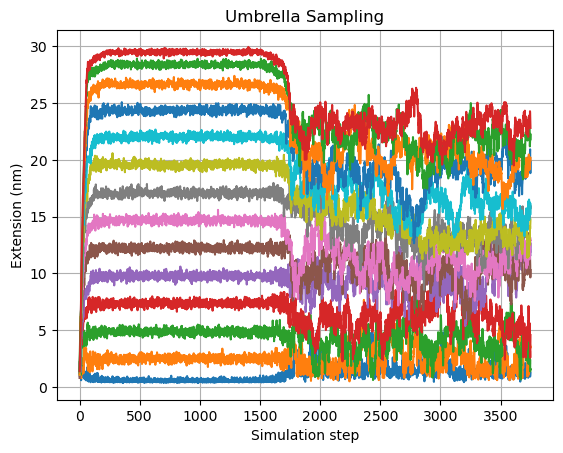

In [10]:
import numpy as np
import matplotlib.pyplot as plt

pathlist = []
for i in range(0,14,1):
    pathlist.append("C:/Users/Thomas/Documents/workspace/research/OpenABC_RNA/tests/" + "umbre1.fc0.83/r10_" + str( round(10 *i * 32/13)/10) + "/corrected_dist.0.txt-good")

for path in pathlist:
    print(path)
    data = np.loadtxt(path)
    x = range(0,np.shape(data)[0],1)   # collective variable (e.g., end-to-end distance)
    F = data[:, 1]   # free energy

    plt.plot(x, F)
    plt.xlabel("Simulation step")
    plt.ylabel("Extension (nm)")
    plt.title("Umbrella Sampling")
    plt.grid(True)
plt.show()


In [3]:
# Display in VMD
display_in_VMD("batch056","007")

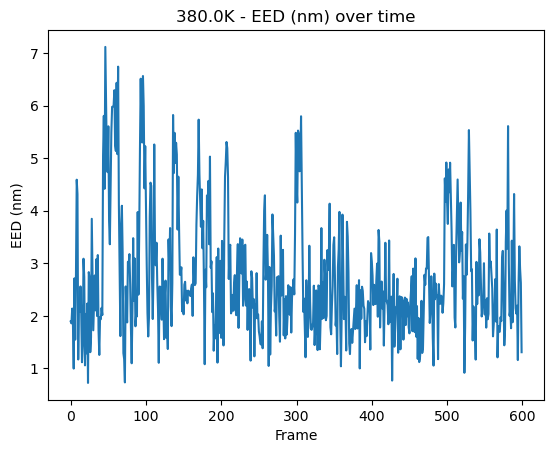

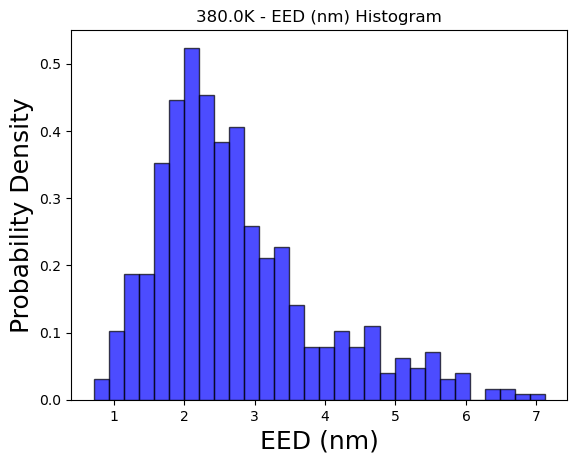

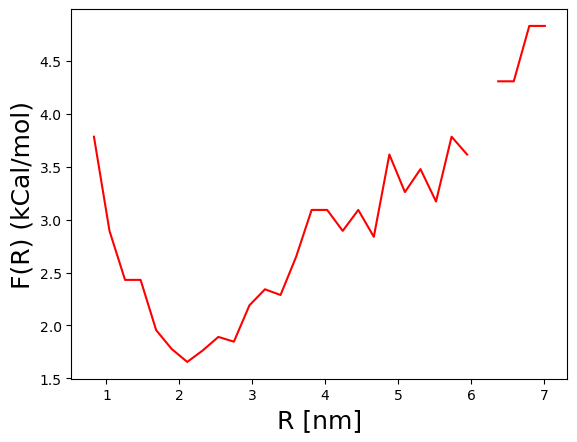

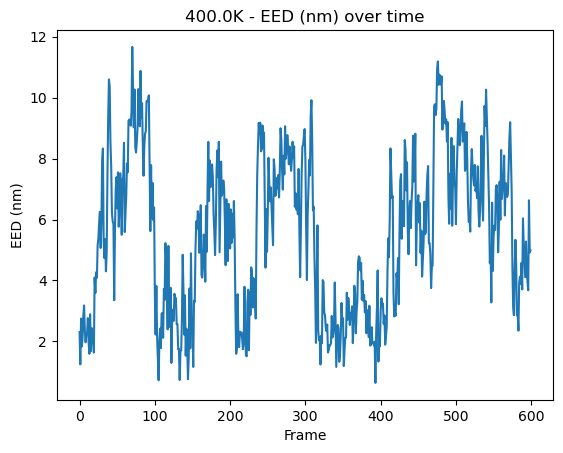

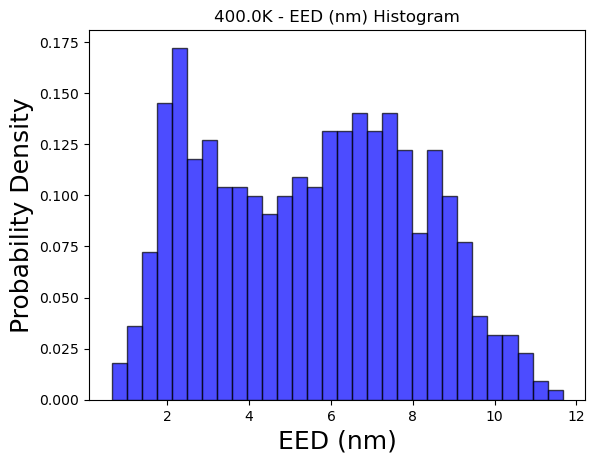

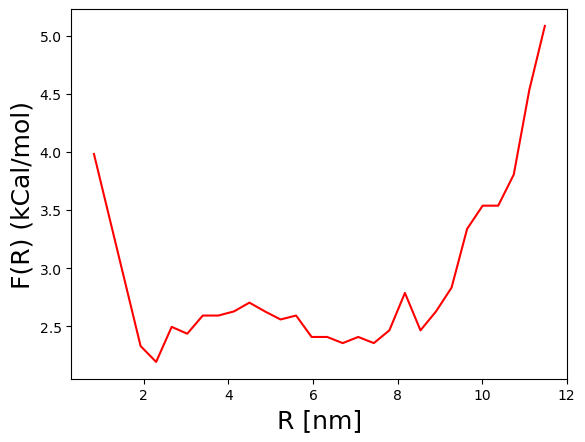

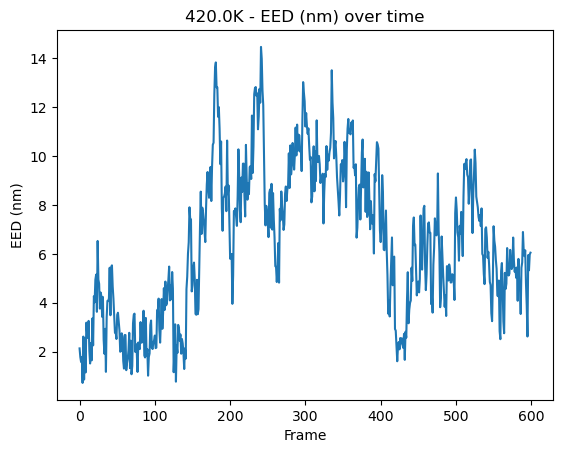

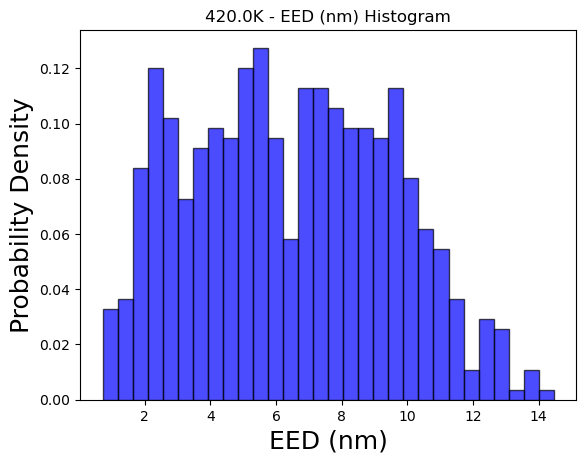

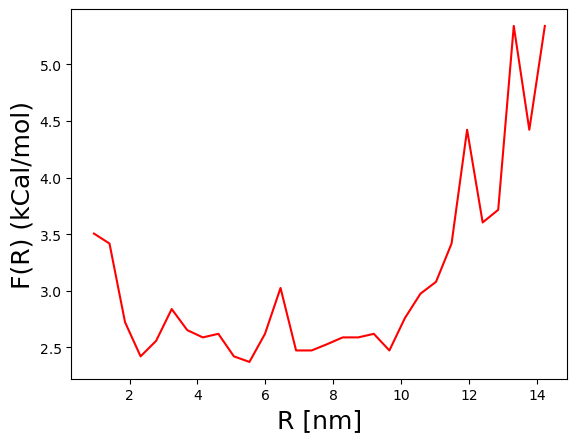

In [ ]:
# End-to-End Distance Plotting

batch_id = "batch046"
start_id = 1
end_id = 1

batch_parameters_file_path = os.path.join(batch_id, "batch_parameters.csv")
ids_from_csv = read_csv_column(batch_parameters_file_path, 0) # gets floats like [1.0,2.0, . . .]
id_number_list = [int(x) for x in ids_from_csv] # converts from float to integer --> [1,2, . . .]
id_list = [str(i).zfill(3) for i in id_number_list] # then converts to --> ["001", "002", . . .]
bins = 30


temperatures = read_csv_column(batch_parameters_file_path, 1)
timesteps = read_csv_column(batch_parameters_file_path, 2)

for i in range(start_id-1, end_id, 1):
    #if i != 6:
    run_id = id_list[i]
    temperature = temperatures[i]
    timestep = timesteps[i]
    collective_variable_type = "EED (nm)"
    batch_file_path = os.path.join(notebook_dir, batch_id)
    EED_for_each_frame, bin_centers, bin_edges, hist_counts, free_energy= EED_analysis(batch_file_path, run_id, temperature, bins, offset=0)
    plot_collective_variable_over_simulation(EED_for_each_frame, collective_variable_type, temperature)
    plt.show()
    plot_collective_variable_histogram(bin_centers, hist_counts, bin_edges, collective_variable_type, temperature)
    plt.show()
    plot_collective_variable_free_energy(bin_centers, free_energy, collective_variable_type, temperature, color="red")
    plt.show()

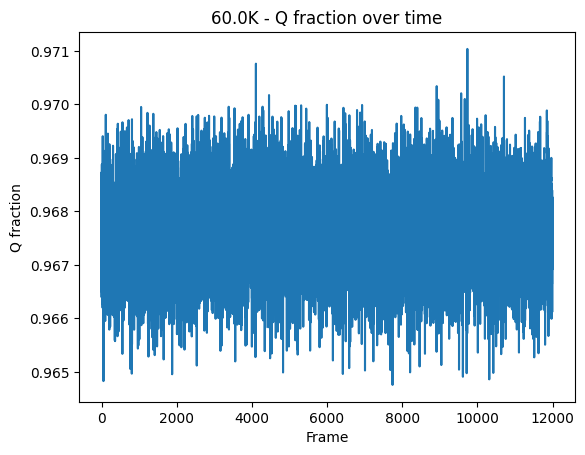

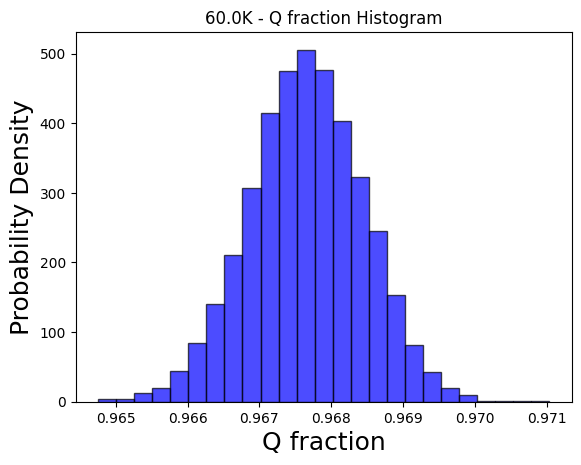

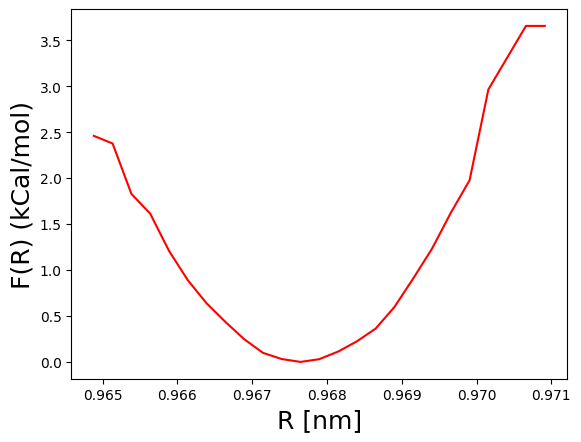

In [12]:
# Fraction of Native Contacts Plotting

batch_id = "batch028"
start_id = 10
end_id = 10

batch_parameters_file_path = os.path.join(batch_id, "batch_parameters.csv")
ids_from_csv = read_csv_column(batch_parameters_file_path, 0) # gets floats like [1.0,2.0, . . .]
id_number_list = [int(x) for x in ids_from_csv] # converts from float to integer --> [1,2, . . .]
id_list = [str(i).zfill(3) for i in id_number_list] # then converts to --> ["001", "002", . . .]
bins = 25

temperatures = read_csv_column(batch_parameters_file_path, 1)
timesteps = read_csv_column(batch_parameters_file_path, 2)

for i in range(start_id-1, end_id, 1):
    collective_variable_type = "Q fraction"
    run_id = id_list[i]
    temperature = temperatures[i]
    timestep = timesteps[i]
    batch_file_path = os.path.join(notebook_dir, batch_id)
    Q_for_each_frame, bin_centers, bin_edges, hist_counts, free_energy= Q_analysis(batch_file_path, run_id, temperature, native_pairs_df, bins, lambda_factor = 0.9, r_0=0.6)
    plot_collective_variable_over_simulation(Q_for_each_frame, collective_variable_type, temperature)
    plt.show()
    plot_collective_variable_histogram(bin_centers, hist_counts, bin_edges, collective_variable_type, temperature)
    plt.show()
    plot_collective_variable_free_energy(bin_centers, free_energy, collective_variable_type, temperature, color="red")
    plt.show()

C:\Users\Thomas\AppData\Local\Temp\ipykernel_44656\311456872.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')#, bbox_to_anchor=(1, 1))


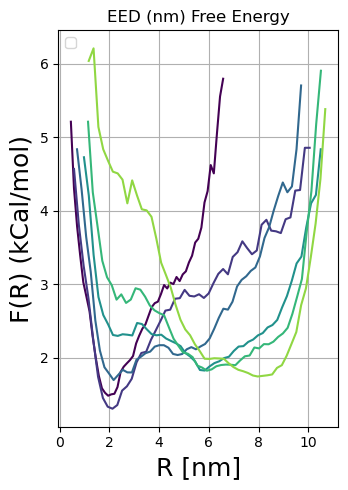

In [5]:
# All EED Free Energy Plotting

batch_id = "batch057"
bins = 50
batch_parameters_file_path = os.path.join(batch_id, "batch_parameters.csv")
ids_from_csv = read_csv_column(batch_parameters_file_path, 0) # gets floats like [1.0,2.0, . . .]
id_number_list = [int(x) for x in ids_from_csv] # converts from float to integer --> [1,2, . . .]
id_list = [str(i).zfill(3) for i in id_number_list] # then converts to --> ["001", "002", . . .]
colors = plt.cm.viridis(np.linspace(0, 1, len(id_list)))

temperatures = read_csv_column(batch_parameters_file_path, 1)
timesteps = read_csv_column(batch_parameters_file_path, 2)
# --- Adjustable Aspect Ratio ---
aspect_ratio = (3.28+0.3, 5)  # (width, height) in inches — change this as needed
fig, ax = plt.subplots()
ax.grid(True)
fig.set_size_inches(*aspect_ratio)

for i in range(len(id_list)):
    if i != 6:
        collective_variable_type = "EED"
        run_id = id_list[i]
        temperature = temperatures[i]
        timestep = timesteps[i]
        collective_variable_type = "EED (nm)"
        batch_file_path = os.path.join(notebook_dir, batch_id)
        EED_for_each_frame, bin_centers, bin_edges, hist_counts, free_energy= EED_analysis(batch_file_path, run_id, temperature, bins, 0)
        plot_collective_variable_free_energy(bin_centers, free_energy, collective_variable_type, temperature, color=colors[i])
plt.title(collective_variable_type + " Free Energy")
plt.legend(loc='upper left')#, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("FIGURE.svg")
plt.show()

c:\Users\Thomas\Documents\workspace\research\OpenABC_RNA\tests\analysis_functions.py:216: RuntimeWarning: divide by zero encountered in log
  free_energy = -kB_kJmol * temperature * np.log(probabilities)
c:\Users\Thomas\Documents\workspace\research\OpenABC_RNA\tests\analysis_functions.py:216: RuntimeWarning: divide by zero encountered in log
  free_energy = -kB_kJmol * temperature * np.log(probabilities)


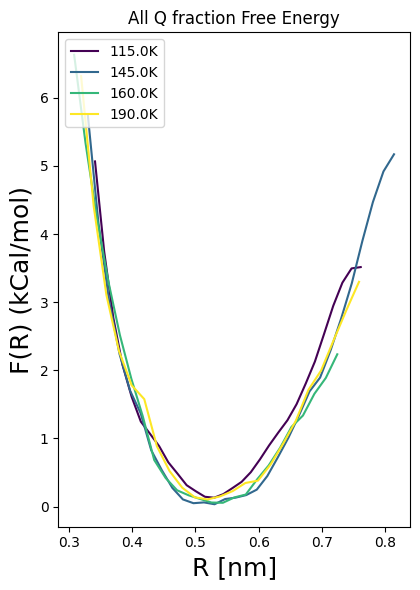

In [6]:
# All Q Free Energy Plotting

batch_id = "batch026"
bins = 30
batch_parameters_file_path = os.path.join(batch_id, "batch_parameters.csv")
ids_from_csv = read_csv_column(batch_parameters_file_path, 0) # gets floats like [1.0,2.0, . . .]
id_number_list = [int(x) for x in ids_from_csv] # converts from float to integer --> [1,2, . . .]
id_list = [str(i).zfill(3) for i in id_number_list] # then converts to --> ["001", "002", . . .]
colors = plt.cm.viridis(np.linspace(0, 1, len(id_list)))

temperatures = read_csv_column(batch_parameters_file_path, 1)
timesteps = read_csv_column(batch_parameters_file_path, 2)

plt.figure(figsize=(4.3, 6))
for i in range(len(id_list)):
    collective_variable_type = "Q fraction"
    run_id = id_list[i]
    temperature = temperatures[i]
    timestep = timesteps[i]
    collective_variable_type = "Q fraction"
    batch_file_path = os.path.join(notebook_dir, batch_id)
    Q_for_each_frame, bin_centers, bin_edges, hist_counts, free_energy = Q_analysis(batch_file_path, run_id, temperature, native_pairs_df, bins, lambda_factor = 0.9, r_0=0.5)
    # Smooth free energy curve (adjust window_length and polyorder as needed)
    window_length = 9  # Must be odd and < len(bin_centers)
    polyorder = 3      # A cubic fit
    free_energy_smoothed = savgol_filter(free_energy, window_length, polyorder)
    if i == 6:
        plot_collective_variable_free_energy(bin_centers, free_energy_smoothed, collective_variable_type, temperature, color="red",label=(str(temperature) + "K"))
    else:
        plot_collective_variable_free_energy(bin_centers, free_energy_smoothed, collective_variable_type, temperature, color=colors[i],label=(str(temperature) + "K"))
    #plot_collective_variable_free_energy(bin_centers, free_energy, collective_variable_type, temperature, color=colors[i], label=(str(temperature) + "K"))
plt.title("All " + collective_variable_type + " Free Energy")
plt.legend(loc='upper left')#, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()